# Overlaying speed traces of two laps

Compare two fastest laps by overlaying their speed traces.


In [ ]:
%pip install fastf1
%pip install seaborn
%matplotlib inline


In [49]:
import matplotlib.pyplot as plt

import fastf1.plotting

import pandas as pd

from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import HTML

import seaborn as sns

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

from matplotlib import gridspec

from matplotlib.collections import LineCollection

In [50]:


# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

# load a session and its telemetry data
grand_prix_session = 'R'
grand_prix_year = 2024
session = fastf1.get_session(grand_prix_year, 1, grand_prix_session)
grand_prix_name = session.event['EventName']
grand_prix_name_official = session.event['OfficialEventName']
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.3.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']


First, we select the two laps that we want to compare



In [ ]:
ver_lap = session.laps.pick_driver('VER').pick_fastest()
per_lap = session.laps.pick_driver('PER').pick_fastest()
#sai_lap = session.laps.pick_driver('SAI').pick_fastest()
lec_lap = session.laps.pick_driver('LEC').pick_fastest()
#bea_lap = session.laps.pick_driver('BEA').pick_fastest()
alo_lap = session.laps.pick_driver('ALO').pick_fastest()
str_lap = session.laps.pick_driver('STR').pick_fastest()
ham_lap = session.laps.pick_driver('HAM').pick_fastest()
rus_lap = session.laps.pick_driver('RUS').pick_fastest()

Next we get the telemetry data for each lap. We also add a 'Distance' column
to the telemetry dataframe as this makes it easier to compare the laps.



In [ ]:
ver_tel = ver_lap.get_car_data().add_distance()
per_tel = per_lap.get_car_data().add_distance()
#sai_tel = sai_lap.get_car_data().add_distance()
lec_tel = lec_lap.get_car_data().add_distance()
#bea_tel = bea_lap.get_car_data().add_distance()
alo_tel = alo_lap.get_car_data().add_distance()
str_tel = str_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()
rus_tel = rus_lap.get_car_data().add_distance()

In [ ]:
def format_lap_time(timedelta):
    """
    Formatea un objeto Timedelta a una cadena en el formato MM:SS.sss.
    
    :param timedelta: Timedelta, el tiempo de vuelta a formatear.
    :return: str, el tiempo formateado como MM:SS.sss.
    """
    total_seconds = timedelta.total_seconds()
    minutes = int(total_seconds // 60)
    seconds = total_seconds % 60
    formatted_time = f"{minutes:02d}:{seconds:06.3f}"
    return formatted_time

Finally, we create a plot and plot both speed traces.
We color the individual lines with the driver's team colors.



In [ ]:
rbr_color = fastf1.plotting.team_color('RBR')
mer_color = fastf1.plotting.team_color('MER')
ast_color = fastf1.plotting.team_color('AST')
fer_color = fastf1.plotting.team_color('FER')
mcl_color = fastf1.plotting.team_color('MCL')

fig, ax = plt.subplots(figsize=(15, 10))
#ax.plot(ver_tel['Distance'], ver_tel['Speed'], label=f"VER {format_lap_time(ver_lap['LapTime'])} ({ver_lap['Compound'][0]})")
#ax.plot(per_tel['Distance'], per_tel['Speed'], label=f"PER {format_lap_time(per_lap['LapTime'])} ({per_lap['Compound'][0]})")
#ax.plot(ver_tel['Distance'], lec_tel['Speed'], label=f"LEC {format_lap_time(lec_lap['LapTime'])} ({lec_lap['Compound'][0]})")
#ax.plot(per_tel['Distance'], bea_tel['Speed'], label=f"BEA {format_lap_time(bea_lap['LapTime'])} ({bea_lap['Compound'][0]})")
#ax.plot(sai_tel['Distance'], sai_tel['Speed'], color=fer_color, label=f"SAI {format_lap_time(sai_lap['LapTime'])} ({sai_lap['Compound'][0]})")
ax.plot(alo_tel['Distance'], alo_tel['Speed'], color=ast_color, label=f"ALO {format_lap_time(alo_lap['LapTime'])} ({alo_lap['Compound'][0]})")
ax.plot(str_tel['Distance'], str_tel['Speed'], label=f"STR {format_lap_time(str_lap['LapTime'])} ({str_lap['Compound'][0]})")
#ax.plot(ham_tel['Distance'], ham_tel['Speed'], color=mer_color, label=f"HAM {format_lap_time(ham_lap['LapTime'])} ({ham_lap['Compound'][0]})")
#ax.plot(rus_tel['Distance'], rus_tel['Speed'], color=mer_color, label=f"RUS {format_lap_time(rus_lap['LapTime'])} ({rus_lap['Compound'][0]})")

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{grand_prix_name} {session.event.year} {grand_prix_session}")

plt.show()

In [ ]:
# Obtén una lista única de corredores desde la sesión
corredores = session.laps['Driver'].unique()

# Prepara la figura de matplotlib
#fig, ax = plt.subplots()
# Prepara la figura de matplotlib con un tamaño mayor
fig, ax = plt.subplots(figsize=(15, 10))  # Ajusta estos valores para cambiar el tamaño


# Itera sobre cada corredor para obtener su vuelta más rápida y graficarla
for corredor in corredores:
    # Selecciona la vuelta más rápida
    vuelta_rapida = session.laps.pick_driver(corredor).pick_fastest()
    
    # Extrae los datos del coche y agrega la distancia
    datos_coche = vuelta_rapida.get_car_data().add_distance()
    
    # Determina el equipo del corredor (si la información está disponible)
    equipo = vuelta_rapida['Team']
    
    # Obtiene el color asociado al equipo del corredor
    color_equipo = fastf1.plotting.team_color(equipo)
    
    # Formatea el tiempo de vuelta para la etiqueta
    tiempo_vuelta = format_lap_time(vuelta_rapida['LapTime'])
    
    # Añade la traza al gráfico
    ax.plot(datos_coche['Distance'], datos_coche['Speed'], color=color_equipo, 
            label=f"{corredor} {tiempo_vuelta} ({vuelta_rapida['Compound'][0]})")

# Ajusta detalles finales del gráfico
ax.legend()
plt.show()

In [ ]:

fastf1.plotting.setup_mpl()

# Asumiendo que 'session' ya contiene los datos de la sesión de interés cargados
# Obtén todas las vueltas más rápidas de todos los corredores
vueltas_rapidas = [session.laps.pick_driver(corredor).pick_fastest() for corredor in session.laps['Driver'].unique()]

# Filtra las vueltas para asegurar que todas tienen un tiempo registrado
vueltas_rapidas = [vuelta for vuelta in vueltas_rapidas if vuelta['LapTime'] is not None]

# Ordena las vueltas por tiempo de vuelta
vueltas_rapidas.sort(key=lambda x: x['LapTime'])

# Selecciona las 10 vueltas más rápidas
diez_vueltas_mas_rapidas = vueltas_rapidas[:8]

# Prepara la figura de matplotlib con un tamaño mayor
fig, ax = plt.subplots(figsize=(15, 10))

# Grafica cada una de las 10 vueltas más rápidas
for vuelta in diez_vueltas_mas_rapidas:
    datos_coche = vuelta.get_car_data().add_distance()
    equipo = vuelta['Team']
    color_equipo = fastf1.plotting.team_color(equipo)
    corredor = vuelta['Driver']
    #tiempo_vuelta = vuelta['LapTime'].total_seconds()  # Modifica aquí según cómo desees formatear el tiempo
    tiempo_vuelta = format_lap_time(vuelta['LapTime'])
    
    ax.plot(datos_coche['Distance'], datos_coche['Speed'], 
            label=f"{corredor} {tiempo_vuelta} ({vuelta_rapida['Compound'][0]})")

# Añade leyendas y ajustes finales al gráfico
ax.legend()
plt.show()

In [ ]:
fastf1.plotting.setup_mpl()

# Preparación inicial igual...
vueltas_rapidas = [session.laps.pick_driver(corredor).pick_fastest() for corredor in session.laps['Driver'].unique()]
vueltas_rapidas = [vuelta for vuelta in vueltas_rapidas if vuelta['LapTime'] is not None]
vueltas_rapidas.sort(key=lambda x: x['LapTime'])
diez_vueltas_mas_rapidas = vueltas_rapidas[:8]

# Vuelta de referencia (la mejor vuelta)
vuelta_referencia = vueltas_rapidas[0]
datos_coche_ref = vuelta_referencia.get_car_data().add_distance()
tiempo_ref = datos_coche_ref['Time'].dt.total_seconds()

fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()  # Segundo eje para el gap de tiempo

for vuelta in diez_vueltas_mas_rapidas:
    datos_coche = vuelta.get_car_data().add_distance()
    equipo = vuelta['Team']
    color_equipo = fastf1.plotting.team_color(equipo)
    corredor = vuelta['Driver']
    tiempo_vuelta = format_lap_time(vuelta['LapTime'])

    # Graficar la velocidad en el primer eje
    ax1.plot(datos_coche['Distance'], datos_coche['Speed'], label=f"{corredor} {tiempo_vuelta} ({vuelta['Compound'][0]})", color=color_equipo)

    # Calcular y graficar el gap de tiempo en el segundo eje
    tiempo_vuelta_sec = datos_coche['Time'].dt.total_seconds()
    distancia = datos_coche['Distance']
    tiempo_ref_interp = np.interp(distancia, datos_coche_ref['Distance'], tiempo_ref)
    gap_tiempo = tiempo_vuelta_sec - tiempo_ref_interp
    
    # Para evitar superposición de etiquetas, podemos no añadir una leyenda aquí, o usar un esquema de color/nombres diferenciado
    ax2.plot(distancia, gap_tiempo, linestyle='--', color=color_equipo, alpha=0.5)  # alpha para diferenciar la línea de gap

# Configuración de los ejes
ax1.set_xlabel('Distancia (m)')
ax1.set_ylabel('Velocidad (km/h)', color='tab:blue')
ax2.set_ylabel('Gap de tiempo (s)', color='tab:red')
ax1.legend(loc='upper left')

plt.show()

In [ ]:
fastf1.plotting.setup_mpl()

# Preparación inicial igual...
vueltas_rapidas = [session.laps.pick_driver(corredor).pick_fastest() for corredor in session.laps['Driver'].unique()]
vueltas_rapidas = [vuelta for vuelta in vueltas_rapidas if vuelta['LapTime'] is not None]
vueltas_rapidas.sort(key=lambda x: x['LapTime'])
diez_vueltas_mas_rapidas = vueltas_rapidas[:8]

# Vuelta de referencia (la mejor vuelta)
vuelta_referencia = vueltas_rapidas[0]
datos_coche_ref = vuelta_referencia.get_car_data().add_distance()
tiempo_ref = datos_coche_ref['Time'].dt.total_seconds()

fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()  # Segundo eje para el gap de tiempo

# Distancias específicas para mostrar el gap de tiempo
distancias_puntos = [450, 1500, 3000, 5000]

# Inicializar diccionario para almacenar los gaps en puntos específicos
gaps_en_puntos = {distancia: [] for distancia in distancias_puntos}

for vuelta in diez_vueltas_mas_rapidas:
    datos_coche = vuelta.get_car_data().add_distance()
    equipo = vuelta['Team']
    color_equipo = fastf1.plotting.team_color(equipo)
    corredor = vuelta['Driver']
    tiempo_vuelta = format_lap_time(vuelta['LapTime'])

    ax1.plot(datos_coche['Distance'], datos_coche['Speed'], label=f"{corredor} {tiempo_vuelta} ({vuelta['Compound'][0]})")

    # Cálculo de gap de tiempo
    tiempo_vuelta_sec = datos_coche['Time'].dt.total_seconds()
    distancia = datos_coche['Distance']
    tiempo_ref_interp = np.interp(distancia, datos_coche_ref['Distance'], tiempo_ref)
    gap_tiempo = tiempo_vuelta_sec - tiempo_ref_interp
    ax2.plot(distancia, gap_tiempo, linestyle='--', alpha=0.5)

    # Calcular y almacenar el gap de tiempo en puntos específicos de distancia
    for punto in distancias_puntos:
        gap_en_punto = np.interp(punto, distancia, gap_tiempo)
        gaps_en_puntos[punto].append((corredor, gap_en_punto))

# Añadir líneas verticales y anotaciones para los puntos específicos
for punto in distancias_puntos:
    # Línea vertical en cada punto específico
    ax1.axvline(x=punto, color='grey', linestyle='--', alpha=0.7)

    # Anotar los gaps de tiempo en los puntos específicos
    texto_anotacion = f"Gap en {punto}m:\n" + "\n".join([f"{corredor}: {gap:.2f}s" for corredor, gap in gaps_en_puntos[punto]])
    ax1.text(punto, ax1.get_ylim()[1], texto_anotacion, verticalalignment='top', horizontalalignment='right')

# Configuración de los ejes
ax1.set_xlabel('Distancia (m)')
ax1.set_ylabel('Velocidad (km/h)', color='tab:blue')
ax2.set_ylabel('Gap de tiempo (s)', color='tab:red')
ax1.legend()

plt.show()

In [ ]:
#####

In [159]:
def name_to_color_hex(nombre):
    """Convierte un nombre en un color hexadecimal."""
    # Obtén un valor hash del nombre y usa los últimos 6 dígitos para el color
    hash_valor = abs(hash(nombre))
    color_hex = f'#{hash_valor:06X}'[-6:]
    color_hex_full = f"#{color_hex}"
    return color_hex_full

MUESTRA GRAFICA

In [ ]:
fastf1.plotting.setup_mpl()

vueltas_rapidas = [session.laps.pick_driver(corredor).pick_fastest() for corredor in session.laps['Driver'].unique()]
vueltas_rapidas = [vuelta for vuelta in vueltas_rapidas if pd.notna(vuelta['LapTime'])]

# Si LapTime ya está en segundos (o convertido a float), ordena directamente
vueltas_rapidas.sort(key=lambda x: x['LapTime'])

diez_vueltas_mas_rapidas = vueltas_rapidas[:10]

# Identificación de la vuelta de referencia (la mejor vuelta) y obtención de su telemetría
vuelta_referencia = vueltas_rapidas[0]
datos_coche_ref = vuelta_referencia.get_car_data().add_distance()
tiempo_ref = datos_coche_ref['Time'].dt.total_seconds()

# Preparación del gráfico con un tamaño mayor
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()  # Creación de un segundo eje para el gap de tiempo

# Definición de las distancias específicas para mostrar el gap de tiempo
distancias_puntos = [450, 1500, 3000, 4500, 6000]

# Inicialización de un diccionario para almacenar los gaps en puntos específicos
gaps_en_puntos = {distancia: [] for distancia in distancias_puntos}

# Procesamiento y gráfica de cada una de las vueltas seleccionadas
for vuelta in diez_vueltas_mas_rapidas:
    datos_coche = vuelta.get_car_data().add_distance()
    equipo = vuelta['Team']
    #color_equipo = fastf1.plotting.team_color(equipo)
    corredor = vuelta['Driver']
    tiempo_vuelta = format_lap_time(vuelta['LapTime'])  # Asegúrate de tener esta función definida
    
    # Gráfica de la velocidad en el primer eje y
    ax1.plot(datos_coche['Distance'], datos_coche['Speed'], label=f"{corredor} {tiempo_vuelta} ({vuelta['Compound'][0]})")
    
    # Cálculo y gráfica del gap de tiempo en el segundo eje y
    tiempo_vuelta_sec = datos_coche['Time'].dt.total_seconds()
    distancia = datos_coche['Distance']
    tiempo_ref_interp = np.interp(distancia, datos_coche_ref['Distance'], tiempo_ref)
    gap_tiempo = tiempo_vuelta_sec - tiempo_ref_interp
    ax2.plot(distancia, gap_tiempo, linestyle='--', alpha=0.5)

    # Cálculo del gap de tiempo en puntos específicos de distancia y almacenamiento para anotaciones posteriores
    for punto in distancias_puntos:
        gap_en_punto = np.interp(punto, distancia, gap_tiempo)
        gaps_en_puntos[punto].append(f"{corredor}: {gap_en_punto:.2f}s")

# Añadir líneas verticales y anotaciones de gap de tiempo en puntos específicos
for punto in distancias_puntos:
    ax1.axvline(x=punto, color='grey', linestyle='--', alpha=0.7)
    
    # Calcular el ajuste para bajar la anotación
    rango_y = ax1.get_ylim()[1] - ax1.get_ylim()[0]  # Diferencia entre el valor máximo y mínimo del eje y
    ajuste = rango_y * 0.05  # Ajuste del 5% del rango del eje y, modifica este valor según necesidad
    
    # Actualiza la posición de la anotación para moverla un poco más abajo
    texto_anotacion = "\n".join(gaps_en_puntos[punto])
    ax1.text(punto, ax1.get_ylim()[1] - ajuste, texto_anotacion, verticalalignment='top', horizontalalignment='right', fontsize=8)

# Configuración de los ejes y visualización final
ax1.set_xlabel('Distancia (m)')
ax1.set_ylabel('Velocidad (km/h)', color='tab:blue')
ax2.set_ylabel('Gap de tiempo (s)', color='tab:red')
ax1.legend()
plt.title(f'Tiempos por Vuelta en {grand_prix_name} {grand_prix_session}')
plt.tight_layout()
plt.show()

MUESTRA GRAFICA + CIRCUITO

                       Date    RPM  Speed  nGear  Throttle  Brake  DRS Source  \
0   2024-03-02 16:05:28.521  11259    285      7       100  False    0    car   
1   2024-03-02 16:05:28.801  11353    286      7       100  False    0    car   
2   2024-03-02 16:05:28.961  11357    287      7       100  False    0    car   
3   2024-03-02 16:05:29.161  11406    289      7       100  False    0    car   
4   2024-03-02 16:05:29.601  11489    291      7       100  False    0    car   
..                      ...    ...    ...    ...       ...    ...  ...    ...   
344 2024-03-02 16:06:59.881  10991    275      7       100  False    0    car   
345 2024-03-02 16:07:00.201  11056    278      7       100  False    0    car   
346 2024-03-02 16:07:00.361  11124    279      7       100  False    0    car   
347 2024-03-02 16:07:00.521  11140    281      7       100  False    0    car   
348 2024-03-02 16:07:00.881  11234    283      7       100  False    0    car   

                      Time 

AttributeError: 'DataFrame' object has no attribute 'concat'

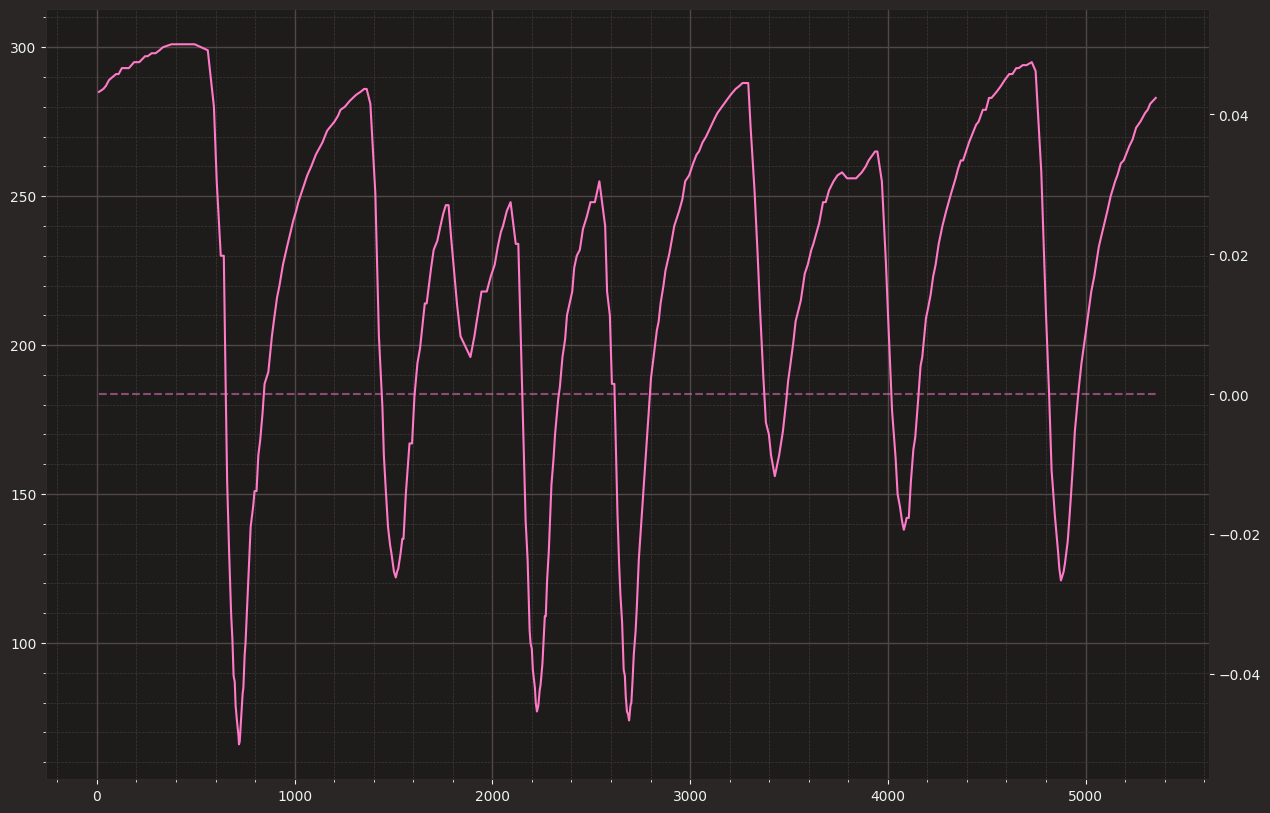

In [78]:
fastf1.plotting.setup_mpl()

vueltas_rapidas = [session.laps.pick_driver(corredor).pick_fastest() for corredor in session.laps['Driver'].unique()]
vueltas_rapidas = [vuelta for vuelta in vueltas_rapidas if pd.notna(vuelta['LapTime'])]

# Si LapTime ya está en segundos (o convertido a float), ordena directamente
vueltas_rapidas.sort(key=lambda x: x['LapTime'])

diez_vueltas_mas_rapidas = vueltas_rapidas[:10]

# Identificación de la vuelta de referencia (la mejor vuelta) y obtención de su telemetría
vuelta_referencia = vueltas_rapidas[0]
datos_coche_ref = vuelta_referencia.get_car_data().add_distance()
tiempo_ref = datos_coche_ref['Time'].dt.total_seconds()

# Preparación del gráfico con un tamaño mayor
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()  # Creación de un segundo eje para el gap de tiempo

# Definición de las distancias específicas para mostrar el gap de tiempo
distancias_puntos = [450, 1500, 3000, 4500, 6000]

# Inicialización de un diccionario para almacenar los gaps en puntos específicos
gaps_en_puntos = {distancia: [] for distancia in distancias_puntos}

#####circuito
telemetry = pd.DataFrame()

# Procesamiento y gráfica de cada una de las vueltas seleccionadas
for vuelta in diez_vueltas_mas_rapidas:
    datos_coche = vuelta.get_car_data().add_distance()
    equipo = vuelta['Team']
    #color_equipo = fastf1.plotting.team_color(equipo)
    corredor = vuelta['Driver']
    tiempo_vuelta = format_lap_time(vuelta['LapTime'])  # Asegúrate de tener esta función definida
    
    # Gráfica de la velocidad en el primer eje y
    ax1.plot(datos_coche['Distance'], datos_coche['Speed'], label=f"{corredor} {tiempo_vuelta} ({vuelta['Compound'][0]})")
    
    # Cálculo y gráfica del gap de tiempo en el segundo eje y
    tiempo_vuelta_sec = datos_coche['Time'].dt.total_seconds()
    distancia = datos_coche['Distance']
    tiempo_ref_interp = np.interp(distancia, datos_coche_ref['Distance'], tiempo_ref)
    gap_tiempo = tiempo_vuelta_sec - tiempo_ref_interp
    ax2.plot(distancia, gap_tiempo, linestyle='--', alpha=0.5)

    # Cálculo del gap de tiempo en puntos específicos de distancia y almacenamiento para anotaciones posteriores
    for punto in distancias_puntos:
        gap_en_punto = np.interp(punto, distancia, gap_tiempo)
        gaps_en_puntos[punto].append(f"{corredor}: {gap_en_punto:.2f}s")

    #####circuito
    driver_telemetry = datos_coche 
    driver_telemetry['Driver'] = vuelta['Driver']
    driver_telemetry['Colour'] = name_to_color_hex(vuelta['Driver'])
    print(driver_telemetry)
    telemetry = telemetry.concat(driver_telemetry, ignore_index=True)



print(telemetry)

# Añadir líneas verticales y anotaciones de gap de tiempo en puntos específicos
for punto in distancias_puntos:
    ax1.axvline(x=punto, color='grey', linestyle='--', alpha=0.7)
    
    # Calcular el ajuste para bajar la anotación
    rango_y = ax1.get_ylim()[1] - ax1.get_ylim()[0]  # Diferencia entre el valor máximo y mínimo del eje y
    ajuste = rango_y * 0.05  # Ajuste del 5% del rango del eje y, modifica este valor según necesidad
    
    # Actualiza la posición de la anotación para moverla un poco más abajo
    texto_anotacion = "\n".join(gaps_en_puntos[punto])
    ax1.text(punto, ax1.get_ylim()[1] - ajuste, texto_anotacion, verticalalignment='top', horizontalalignment='right', fontsize=8)

# Configuración de los ejes y visualización final
ax1.set_xlabel('Distancia (m)')
ax1.set_ylabel('Velocidad (km/h)', color='tab:blue')
ax2.set_ylabel('Gap de tiempo (s)', color='tab:red')
ax1.legend()
plt.title(f'Tiempos por Vuelta en {grand_prix_name} {grand_prix_session}')
plt.tight_layout()
plt.show()

EXPORTA DATOS Y CREA GRAFICA

In [ ]:
fastf1.plotting.setup_mpl()

vueltas_rapidas = [session.laps.pick_driver(corredor).pick_fastest() for corredor in session.laps['Driver'].unique()]
vueltas_rapidas = [vuelta for vuelta in vueltas_rapidas if pd.notna(vuelta['LapTime'])]

# Si LapTime ya está en segundos (o convertido a float), ordena directamente
vueltas_rapidas.sort(key=lambda x: x['LapTime'])

diez_vueltas_mas_rapidas = vueltas_rapidas[:8]

# Identificación de la vuelta de referencia (la mejor vuelta) y obtención de su telemetría
vuelta_referencia = vueltas_rapidas[0]
datos_coche_ref = vuelta_referencia.get_car_data().add_distance()
tiempo_ref = datos_coche_ref['Time'].dt.total_seconds()

# Preparación del gráfico con un tamaño mayor
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()  # Creación de un segundo eje para el gap de tiempo

# Definición de las distancias específicas para mostrar el gap de tiempo
distancias_puntos = [450, 1500, 3000, 4500, 6000]

# Inicialización de un diccionario para almacenar los gaps en puntos específicos
gaps_en_puntos = {distancia: [] for distancia in distancias_puntos}

# Lista para almacenar los datos antes de crear el DataFrame
datos_list = []

# Procesamiento y gráfica de cada una de las vueltas seleccionadas
for vuelta in diez_vueltas_mas_rapidas:
    datos_coche = vuelta.get_car_data().add_distance()
    equipo = vuelta['Team']
    #color_equipo = fastf1.plotting.team_color(equipo)
    corredor = vuelta['Driver']
    tiempo_vuelta = format_lap_time(vuelta['LapTime'])  # Asegúrate de tener esta función definida
    
    # Gráfica de la velocidad en el primer eje y
    ax1.plot(datos_coche['Distance'], datos_coche['Speed'], label=f"{corredor} {tiempo_vuelta} ({vuelta['Compound'][0]})")
    
    # Cálculo y gráfica del gap de tiempo en el segundo eje y
    tiempo_vuelta_sec = datos_coche['Time'].dt.total_seconds()
    distancia = datos_coche['Distance']
    tiempo_ref_interp = np.interp(distancia, datos_coche_ref['Distance'], tiempo_ref)
    gap_tiempo = tiempo_vuelta_sec - tiempo_ref_interp
    ax2.plot(distancia, gap_tiempo, linestyle='--', alpha=0.5)

    # Compilar datos para cada punto de distancia
    for d, s, g in zip(distancia, datos_coche['Speed'], gap_tiempo):
        datos_list.append({
            'Driver': corredor, 
            'LapTime': tiempo_vuelta, 
            'Distance': d, 
            'Speed': s, 
            'GapTime': g
        })

    # Cálculo del gap de tiempo en puntos específicos de distancia y almacenamiento para anotaciones posteriores
    for punto in distancias_puntos:
        gap_en_punto = np.interp(punto, distancia, gap_tiempo)
        gaps_en_puntos[punto].append(f"{corredor}: {gap_en_punto:.2f}s")

# Añadir líneas verticales y anotaciones de gap de tiempo en puntos específicos
for punto in distancias_puntos:
    ax1.axvline(x=punto, color='grey', linestyle='--', alpha=0.7)
    
    # Calcular el ajuste para bajar la anotación
    rango_y = ax1.get_ylim()[1] - ax1.get_ylim()[0]  # Diferencia entre el valor máximo y mínimo del eje y
    ajuste = rango_y * 0.05  # Ajuste del 5% del rango del eje y, modifica este valor según necesidad
    
    # Actualiza la posición de la anotación para moverla un poco más abajo
    texto_anotacion = "\n".join(gaps_en_puntos[punto])
    ax1.text(punto, ax1.get_ylim()[1] - ajuste, texto_anotacion, verticalalignment='top', horizontalalignment='right', fontsize=8)

# Configuración de los ejes y visualización final
ax1.set_xlabel('Distancia (m)')
ax1.set_ylabel('Velocidad (km/h)', color='tab:blue')
ax2.set_ylabel('Gap de tiempo (s)', color='tab:red')
ax1.legend()
plt.title(f'Tiempos por Vuelta en {grand_prix_name} {grand_prix_session}')
plt.tight_layout()
plt.show()

# Crear el DataFrame de pandas a partir de la lista de datos
datos_para_exportar = pd.DataFrame(datos_list)

# Exportar el DataFrame a un archivo CSV
ruta_archivo = 'datos_vueltas_rapidas.csv'
datos_para_exportar.to_csv(ruta_archivo, index=False)

In [ ]:


# Obtener los resultados finales y convertirlos a un DataFrame de pandas
results = session.results
# Asegúrate de que 'TotalTime' está en un formato que permita la comparación, como timedelta si no lo está ya
results['Time'] = pd.to_timedelta(results['Time'])

# Ordena los resultados por 'TotalTime'
results_sorted = results.sort_values(by='Time')

# Selecciona los primeros 8 registros después de ordenar
top8 = results_sorted.head(8)

# Obtener las vueltas rápidas de los pilotos que terminaron en el top 8
vueltas_rapidas_top8 = [session.laps.pick_driver(row['Abbreviation']).pick_fastest() for index, row in top8.iterrows()]
vueltas_rapidas_top8 = [vuelta for vuelta in vueltas_rapidas_top8 if pd.notna(vuelta['LapTime'])]

# Calcula la media de los tiempos de vuelta (en segundos)
tiempos_vuelta = [vuelta['LapTime'].total_seconds() for vuelta in vueltas_rapidas_top8]
media_tiempos = np.mean(tiempos_vuelta)

# Preparación del gráfico
plt.figure(figsize=(10, 6))
plt.bar(range(len(vueltas_rapidas_top8)), tiempos_vuelta, color='skyblue', label='Tiempo de vuelta')
plt.axhline(y=media_tiempos, color='darkred', linestyle='--', label='Media de tiempos')
plt.xticks(range(len(vueltas_rapidas_top8)), [vuelta['Driver'] for vuelta in vueltas_rapidas_top8], rotation=45)
plt.ylabel('Tiempo de vuelta (s)')
plt.xlabel('Piloto')
plt.title(f'Tiempos de Vuelta Media para los Top 8')
plt.legend()
plt.tight_layout()
plt.show()


## Team comparison

In [ ]:
laps = session.laps.pick_quicklaps()
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

# make a color palette associating team names to hex codes
team_palette = {team: fastf1.plotting.team_color(team) for team in team_order}

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title(f"Team Pace Ranking - {grand_prix_year} {grand_prix_name} {grand_prix_session}")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

Análisis de estrategias de neumatico

In [ ]:

laps = session.laps
drivers = session.drivers
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()
stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)


fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]


plt.title("2022 Hungarian Grand Prix Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

Gráfica de tiempos por vuelta y neumatico

In [ ]:
def normalize_to_range(values, new_min=0, new_max=5, adjust=50):
    # Restar 50 a todos los valores antes de la normalización
    adjusted_values = values - adjust
    
    old_min = np.min(adjusted_values)
    old_max = np.max(adjusted_values)
    # Aplicar la fórmula de normalización a los valores ajustados
    scaled_values = new_min + ((adjusted_values - old_min) * (new_max - new_min) / (old_max - old_min))
    return scaled_values


In [ ]:

laps = session.laps
drivers = session.drivers
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers][:10]
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
#print(stints)
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()
stints = stints.rename(columns={"LapNumber": "StintLength"})


fig, ax = plt.subplots(figsize=(15, 5))

# Variables para controlar el layout de las barras
bar_height = 1
current_bottom = 0

###fig, ax = plt.subplots(figsize=(5, 10))

compound_opacity = {
    'soft': 0.6,
    'medium': 0.7,
    'hard': 0.8
    # Añade más compuestos y opacidades según sea necesario
}

for driver in drivers:
    driver_stints = stints.loc[stints['Driver'] == driver]
    driver_laps = laps[laps['Driver'] == driver]
    
    previous_stint_end = 0
    for _, row in driver_stints.iterrows():
        opacity = compound_opacity.get(row['Compound'], 0.5)  # Valor por defecto si el compuesto no está en el diccionario
        
        # Dibujar barra para el stint
        ax.barh(
            y=current_bottom,
            width=row['StintLength'],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS.get(row['Compound'], 'grey'),
            edgecolor='black',
            height=bar_height,
            alpha=opacity
        )
        previous_stint_end += row['StintLength']
    
    # Dibujar puntos para los tiempos por vuelta
    #driver_laps['LapTimeSeconds'] = driver_laps['LapTime'].dt.total_seconds()
    driver_laps = driver_laps.copy()
    #print(driver_laps['PitInTime'][6])

    driver_laps['LapTimeSeconds'] = driver_laps['LapTime'].dt.total_seconds()

    # Luego, establecemos 'LapTimeSeconds' como NaN para las vueltas en las que el piloto estuvo en el pitstop
    # Esto se hace verificando si 'PitInTime' o 'PitOutTime' tienen algún valor (no son nulos)
    driver_laps.loc[(driver_laps['PitInTime'].notna()) | (driver_laps['PitOutTime'].notna()), 'LapTimeSeconds'] = np.nan


    #print(driver_laps['LapTimeSeconds'])
    #print(pd.Categorical(driver_laps['Driver']).codes + current_bottom + bar_height / 2 + normalize_to_range(driver_laps['LapTimeSeconds']))
    sns.scatterplot(
        data=driver_laps,
        x='LapNumber',
        y=pd.Categorical(driver_laps['Driver']).codes + current_bottom + normalize_to_range(driver_laps['LapTimeSeconds'],0.4,-0.2,90),  # Ajustar y para alinear con la barra del piloto
        hue='Compound',
        palette=fastf1.plotting.COMPOUND_COLORS,
        s=40,
        linewidth=1,
        legend=False,  # Cambiar a 'brief' o 'full' si quieres una leyenda
        ax=ax
    )
    
    current_bottom += 1  # Ajustar para la siguiente barra

ax.set_yticks(range(len(drivers)))
ax.set_yticklabels(drivers)
ax.invert_yaxis()  # Opcional, dependiendo de cómo quieras visualizar los pilotos

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

Ficha grande

In [ ]:
#import matplotlib.pyplot as plt
#from matplotlib.offsetbox import OffsetImage, AnnotationBbox
#from PIL import Image
#import numpy as np

def add_team_logo(ax, team_name, zoom=0.2):
    """
    Carga y muestra el escudo del equipo en el eje proporcionado.
    
    Parámetros:
    ax -- el eje de Matplotlib donde se colocará la imagen.
    team_name -- el nombre del equipo, que corresponde al nombre del archivo de imagen.
    zoom -- el nivel de zoom para la imagen.
    """
    base_path = './images/teams/'  # Actualiza con la ruta correcta a tus imágenes
    file_path = f'{base_path}{team_name}.png'  # Asume que el nombre de la imagen es el mismo que el nombre del equipo
    
    try:
        # Carga la imagen
        img = Image.open(file_path)
        
        # Convierte la imagen PIL a un objeto de imagen que Matplotlib pueda manejar
        img = np.array(img)
        
        # Crear el objeto OffsetImage
        imagebox = OffsetImage(img, zoom=zoom)
        
        # Crear el objeto AnnotationBbox y colocarlo en el eje
        ab = AnnotationBbox(imagebox, (0.5, 0.5), frameon=False, boxcoords="axes fraction")
        ax.add_artist(ab)
        
    except FileNotFoundError:
        print(f'El archivo {file_path} no existe.')



In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt
#from matplotlib import gridspec

font_driver_number = 50
font_driver_name = 36

# Datos simulados
n_vueltas = 11
vueltas = np.arange(1, n_vueltas + 1)
tiempos_leclerc = np.random.uniform(80, 90, size=n_vueltas)
tiempos_sainz = tiempos_leclerc + np.random.normal(0, 0.2, size=n_vueltas)  # tiempos similares con variación normal
delta_tiempo = tiempos_sainz - tiempos_leclerc

# Iniciar la figura con GridSpec
fig = plt.figure(figsize=(24, 16))
gs = gridspec.GridSpec(8, 12, figure=fig)

# Título grande del header
fig.suptitle('Análisis de Calificación - Monza', fontsize=24, color='white')

# Información del piloto 1
ax1 = fig.add_subplot(gs[1, 0])
ax1.text(0.5, 0.5, '1', ha='center', va='center', fontsize=font_driver_number, color='white')
ax1.axis('off')

ax2 = fig.add_subplot(gs[1, 1:3])
ax2.text(0.5, 0.5, 'Charles\nLeclerc', ha='center', va='center', fontsize=font_driver_name, color='white')
ax2.axis('off')

ax3 = fig.add_subplot(gs[1, 3])
#ax3.text(0.5, 0.5, 'Escudo', ha='center', va='center', fontsize=12, color='yellow')
add_team_logo(ax3, 'ferrari', zoom=0.8)  # reemplaza 'nombre_equipo' con el nombre correspondiente
ax3.axis('off')

# Información del piloto 2
ax4 = fig.add_subplot(gs[1, 8])
ax4.text(0.5, 0.5, '2', ha='center', va='center', fontsize=font_driver_number, color='white')
ax4.axis('off')

ax5 = fig.add_subplot(gs[1, 9:11])
ax5.text(0.5, 0.5, 'Carlos\nSainz', ha='center', va='center', fontsize=font_driver_name, color='white')
ax5.axis('off')

ax6 = fig.add_subplot(gs[1, 11])
#ax6.text(0.5, 0.5, 'Escudo', ha='center', va='center', fontsize=12, color='red')
add_team_logo(ax6, 'ferrari', zoom=0.8)  # reemplaza 'nombre_equipo' con el nombre correspondiente
ax6.axis('off')

# Otros datos para los pilotos (simulados por texto por ahora)
ax7 = fig.add_subplot(gs[3, 0:4])
ax7.text(0.5, 0.5, 'Otros Datos\nPiloto 1', ha='center', va='center', fontsize=12, color='white')
ax7.axis('off')

ax8 = fig.add_subplot(gs[3, 8:12])
ax8.text(0.5, 0.5, 'Otros Datos\nPiloto 2', ha='center', va='center', fontsize=12, color='white')
ax8.axis('off')

# Mapa del circuito en el centro
ax_map = fig.add_subplot(gs[1:4, 4:8])
ax_map.text(0.5, 0.5, 'Mapa\ndel Circuito', ha='center', va='center', fontsize=12, color='white')
ax_map.axis('off')

# Tiempos por vuelta de ambos pilotos
ax_time_comparison = fig.add_subplot(gs[4:7, :])
ax_time_comparison.plot(vueltas, tiempos_leclerc, label='Charles Leclerc', color='yellow')
ax_time_comparison.plot(vueltas, tiempos_sainz, label='Carlos Sainz', color='red')
ax_time_comparison.set_title('Tiempos por Vuelta')
ax_time_comparison.set_xlabel('Vuelta')
ax_time_comparison.set_ylabel('Tiempo (s)')
ax_time_comparison.legend()

# Delta de tiempo entre ellos en la fila 8
ax_delta_time = fig.add_subplot(gs[7, :])
ax_delta_time.bar(vueltas, delta_tiempo, color='cyan')
ax_delta_time.set_title('Delta de Tiempo')
ax_delta_time.set_xlabel('Vuelta')
ax_delta_time.set_ylabel('Delta (s)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta el layout para el título
plt.show()


Mapa de sectores


In [ ]:
import fastf1 as ff1
from fastf1 import plotting
import matplotlib.pyplot as plt

# Configuración para que las gráficas se vean más estilizadas
plotting.setup_mpl()

# Obtener los tiempos de sector más rápidos
best_sectors = session.results[['DriverNumber', 'BestSector1Time', 'BestSector2Time', 'BestSector3Time']]

# Identificar qué piloto fue el más rápido en cada sector
fastest_sector1 = best_sectors['BestSector1Time'].idxmin()
fastest_sector2 = best_sectors['BestSector2Time'].idxmin()
fastest_sector3 = best_sectors['BestSector3Time'].idxmin()

# Obtener datos de telemetría
track = session.get_track_layout()
track.plot()

# Graficar el mapa del circuito
plt.plot(track['X'], track['Y'], color='grey')

# Resaltar los sectores más rápidos (esto es un ejemplo, necesitas los datos de los sectores específicos)
plt.plot(track['X'][sector1_indices], track['Y'][sector1_indices], color='color_for_fastest_sector1')
plt.plot(track['X'][sector2_indices], track['Y'][sector2_indices], color='color_for_fastest_sector2')
plt.plot(track['X'][sector3_indices], track['Y'][sector3_indices], color='color_for_fastest_sector3')

# Mostrar la gráfica
plt.show()


In [ ]:
# Supongamos que tenemos dos pilotos de interés: VER (Verstappen) y HAM (Hamilton)
piloto1_code = 'VER'
piloto2_code = 'HAM'

# Supongamos que determinamos que hay tres curvas clave que queremos analizar
# Estas ubicaciones son totalmente hipotéticas y solo para fines de demostración
curvas_interes = [1000, 2600, 4000]  # Distancias hipotéticas en metros desde el inicio de la vuelta

# Obtener las vueltas más rápidas para los pilotos de interés
vuelta_piloto1 = laps.pick_driver(piloto1_code).pick_fastest()
vuelta_piloto2 = laps.pick_driver(piloto2_code).pick_fastest()

# Obtener la telemetría de las vueltas más rápidas
telem_piloto1 = vuelta_piloto1.get_telemetry()
telem_piloto2 = vuelta_piloto2.get_telemetry()

plt.figure(figsize=(12, 10))

# Suponiendo que el circuito se puede dividir en 5 secciones principales
num_secciones = 5
distancia_total = max(telem_piloto1['Distance'].max(), telem_piloto2['Distance'].max())
seccion_longitud = distancia_total / num_secciones

for i in range(num_secciones):
    inicio_seccion = i * seccion_longitud
    fin_seccion = (i + 1) * seccion_longitud
    
    # Filtrar los datos de telemetría para esta sección
    seccion_piloto1 = telem_piloto1[(telem_piloto1['Distance'] >= inicio_seccion) & (telem_piloto1['Distance'] < fin_seccion)]
    seccion_piloto2 = telem_piloto2[(telem_piloto2['Distance'] >= inicio_seccion) & (telem_piloto2['Distance'] < fin_seccion)]
    
    # Alternar colores para las secciones; esto es ilustrativo
    color = 'red' if i % 2 == 0 else 'blue'
    
    plt.plot(seccion_piloto1['X'], seccion_piloto1['Y'], color=color, linewidth=2)
    plt.plot(seccion_piloto2['X'], seccion_piloto2['Y'], color=color, linewidth=2)

plt.title('Mapa del Circuito con Secciones Destacadas')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')  # Mantiene la proporción
plt.show()



el codigo de github


core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


        Distance  Speed           X            Y Driver   Colour
2       0.000000    294 -375.115354  1377.287634    HAM  #00d2be
3       3.195833    295 -374.279544  1396.226942    HAM  #00d2be
4      19.530833    297 -369.000000  1514.000000    HAM  #00d2be
5      26.258333    299 -366.341271  1572.588296    HAM  #00d2be
6      47.841667    300 -356.000000  1797.000000    HAM  #00d2be
..           ...    ...         ...          ...    ...      ...
701  5328.775556    281 -393.000000  1011.000000    VER  #0600ef
702  5352.118889    282 -386.000000  1151.000000    VER  #0600ef
703  5356.992778    283 -383.000000  1196.000000    VER  #0600ef
704  5364.696667    283 -380.000000  1277.000000    VER  #0600ef
705  5366.033056    283 -379.000000  1291.000000    VER  #0600ef

[1408 rows x 6 columns]


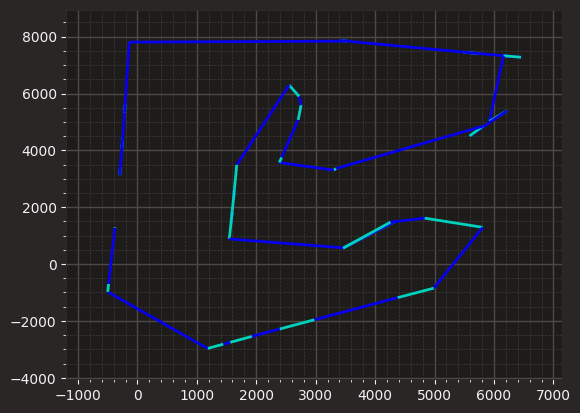

In [86]:
laps = session.laps
laps = laps.pick_quicklaps(threshold=1.03)
# Suponiendo que quieres seguir usando una selección de conductores específicos
driver_list = ['HAM', 'VER']

telemetry = pd.DataFrame()
for driver in driver_list:
    driver_telemetry = laps.pick_driver(driver).pick_fastest().get_telemetry().add_distance()
    driver_telemetry['Driver'] = driver
    # Aquí, asigna un color genérico en lugar de usar driver_year_color
    driver_telemetry['Colour'] = driver_colors[driver]
    telemetry = pd.concat([telemetry, driver_telemetry])

telemetry = telemetry[['Distance', 'Speed', 'X', 'Y', 'Driver', 'Colour']]

print(telemetry)
# Define el número de minisectores
num_minisectors = 25
total_distance = telemetry['Distance'].max()
minisector_length = total_distance / num_minisectors

# Asigna minisectores
telemetry['Minisector'] = telemetry['Distance'].apply(lambda x: int(x // minisector_length) + 1)

# Identifica al conductor más rápido por minisector
fastest_per_minisector = telemetry.loc[telemetry.groupby('Minisector')['Speed'].idxmax()]

# Prepara los datos para la visualización
points = np.array(list(zip(fastest_per_minisector['X'], fastest_per_minisector['Y']))).reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
colors = fastest_per_minisector['Colour'].tolist()

# Visualización
fig, ax = plt.subplots()
lc = LineCollection(segments, colors=colors, linewidths=2)
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)
plt.show()



el codigo de github mejorado


core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


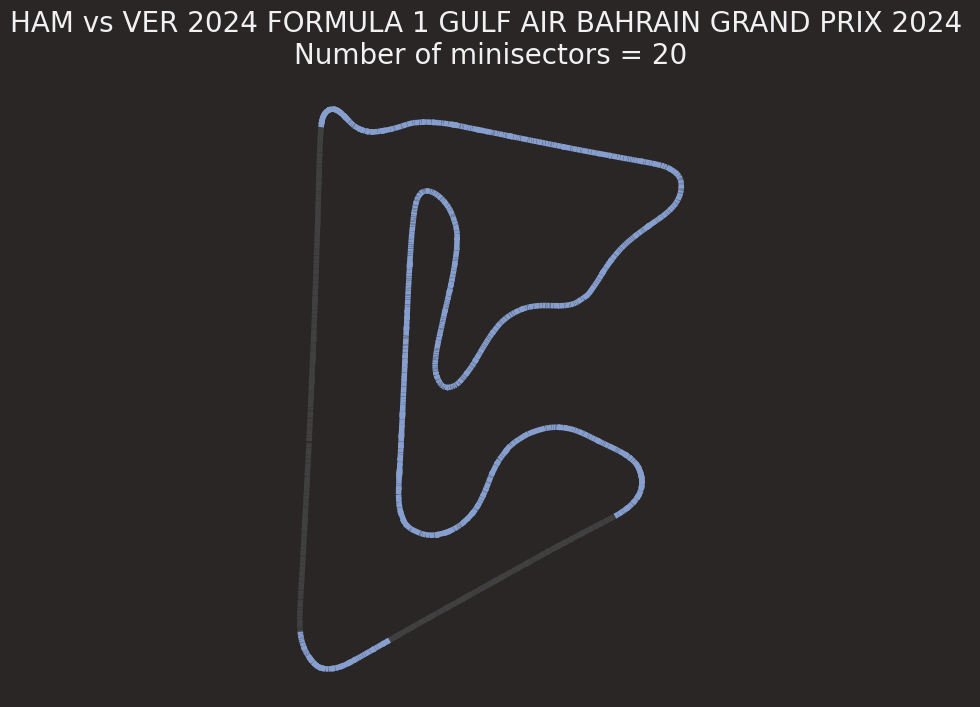

ValueError: Image size of 9280525x7855544 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1600x900 with 1 Axes>

In [165]:
laps = session.laps
laps = laps.pick_quicklaps(threshold=1.03)
# Suponiendo que quieres seguir usando una selección de conductores específicos
driver_list = ['HAM', 'VER']

telemetry = pd.DataFrame()
for driver in driver_list:

    ##print(laps.pick_driver(driver).columns) ## ['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       #'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       #'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       #'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       #'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       #'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       #'FastF1Generated', 'IsAccurate']
    driver_telemetry = laps.pick_driver(driver).pick_fastest().get_telemetry().add_distance()
    driver_telemetry['Driver'] = driver
    # Aquí, asigna un color genérico en lugar de usar driver_year_color
    driver_telemetry['Colour'] = driver_colors[driver]
    driver_number = laps.pick_driver(driver).iloc[0]['DriverNumber']

    driver_telemetry['DriverNumber'] = int(driver_number)
    telemetry = pd.concat([telemetry, driver_telemetry])

telemetry = telemetry[['Distance', 'Speed', 'X', 'Y', 'Driver', 'DriverNumber', 'Colour']]

# Define el número de minisectores
num_minisectors = 30 #
total_distance = telemetry['Distance'].max()
minisector_length = total_distance / num_minisectors

#Assign distances to each minisector
minisectors = [0]

for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))

# Assign minisector to every row in the telemetry data
telemetry['Minisector'] =  telemetry['Distance'].apply(
  lambda z: (
    minisectors.index(
      min(minisectors, key=lambda x: abs(x-z)))+1
  )
)

# Calculate fastest driver (highest average speed) per mini sector
average_speed = telemetry.groupby(['Minisector' , 'Driver'])['Speed'].mean().reset_index()

# Select the driver with the highest average speed
fastest_drivers = average_speed.loc[average_speed.groupby(['Minisector', 'Driver'])['Speed'].idxmax()]

#Perhaps for use later in interactive sector plot
b=fastest_drivers.sort_values(by=['Minisector', 'Speed'])  #try to have speed descending order?

# Sort to find fastest driver for each minisector
fastest_minisector = fastest_drivers.sort_values('Speed', ascending = False).drop_duplicates(['Minisector'])
fastest_minisector = fastest_minisector.sort_values(by = ['Minisector'])
fastest_minisector = fastest_minisector[[ 'Minisector', 'Driver' , 'Speed']].rename(columns={'Speed': 'Sector_avg_speed', 'Driver' : 'Fastest_driver'})

# Get rid of the speed column and rename the driver column
fastest_drivers = fastest_drivers[[ 'Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})

# Join the fastest minisector dataframe with the full telemetry
# to merge minisector, fastest driver in each and avg speed in that minisector

telemetry = telemetry.merge(fastest_minisector, on=['Minisector'])

# Order the data by distance

telemetry = telemetry.sort_values(by=['Distance'])

# Assign integer value to the fastest driver in each minisector (driver number)
for driver in driver_list: 
    driver_number = telemetry[telemetry['Driver'] == driver].iloc[0]['DriverNumber']
    telemetry.loc[telemetry['Fastest_driver'] == driver , 'Fastest_driver_int'] = driver_number
            
# Get X, Y coordinates of the circuit
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

# Divide up the circuit into 2D into segments
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

minisector_int = telemetry['Fastest_driver_int'].to_numpy().astype(float)
#minisector_str = telemetry['Fastest_driver_int']

minisector_fastest_drivers = telemetry['Fastest_driver'].unique()
minisector_fastest_drivers_num = telemetry['Fastest_driver_int'].unique()

minisector_colours = []

for driver in minisector_fastest_drivers:
   minisector_colours.append(name_to_color_hex(laps.pick_driver(driver).pick_fastest()['Driver']))
   
minisector_colours = np.array(minisector_colours)

minisector_details = pd.DataFrame({'Fastest_driver' : minisector_fastest_drivers, 'Fastest_driver_int' : minisector_fastest_drivers_num, 'Minisector_colours' :  minisector_colours }, columns=['Fastest_driver', 'Fastest_driver_int', 'Minisector_colours'])

# Sort order by driver number min to max. 
minisector_details = minisector_details.sort_values(by = ['Fastest_driver_int'])

# Get driver number, colour, name for plotting
num_list_ordered = minisector_details['Fastest_driver_int'].tolist()
colour_list_ordered = minisector_details['Minisector_colours'].tolist()
driver_name_ordered = minisector_details['Fastest_driver'].tolist()

############################################################################################################################################
"This seems to work despite but i dont really undertsand why"

#Quick fix to sort out colorbar error, add 1 to the last number
###num_list_ordered.insert(len(num_list_ordered),(num_list_ordered[-1] +1))

##############################################################################################################################

# Create figure and size of the figure
fig, ax = plt.rcParams['figure.figsize'] = [16, 9]
plt.figure(figsize=(10, 8))  # Tamaño en pulgadas

# Define the colour map using the driver colours
cmap = mpl.colors.ListedColormap(colour_list_ordered)
cmap.set_over('0.25')
cmap.set_under('0.75')

bounds = num_list_ordered
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Create a linecollection of segments using the colour map
lc_comp = LineCollection(segments, norm=norm, cmap=cmap)
lc_comp.set_array(minisector_int)
lc_comp.set_linewidth(4)

# Plot the linecollection
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.axis('off')

# For 1v1 driver vs driver
plt.title((driver_list[0] + ' vs ' + driver_list[1] + ' ' + str(grand_prix_year) + ' ' + str(grand_prix_name_official) + ' ' + '\n' + 'Number of minisectors = ' + str(num_minisectors) ), fontsize = 20)

# For many drivers
#plt.title((str(session.weekend.year) + ' ' + str(session.weekend.name) + ' ' + str(session.name) + '\n' + 'Number of minisectors = ' + str(num_minisectors) ), fontproperties=prop, fontsize = 20)

plt.show()
#plt.savefig('./mi_imagen.png', dpi=100)



# Calculate the average (mean) x,y positions of the fastest minisectors

average_xy = telemetry.groupby(['Minisector', 'Driver'])[['Speed', 'X', 'Y']].mean().reset_index()

# Ideally the median (x,y) would work best but it doesnt select the driver with the highest mean speed through the sector

# Select the driver with the highest average speed
fastest_drivers_xy= average_xy.loc[average_xy.groupby(['Minisector', 'Driver', 'Y', 'X'])['Speed'].idxmax()]

# Sort to find fastest driver for each minisector
fastest_minisector_xy = fastest_drivers_xy.sort_values('Speed', ascending = False).drop_duplicates(['Minisector'])
fastest_minisector_xy = fastest_minisector_xy.sort_values(by = ['Minisector'])
fastest_minisector_xy = fastest_minisector_xy[[ 'Minisector', 'Driver' , 'Speed', 'X', 'Y']].rename(columns={'Speed': 'Sector_avg_speed', 'Driver' : 'Fastest_driver', 'X' : 'X_avg' , 'Y' : 'Y_avg'})

# Rename the driver column
fastest_drivers_xy = fastest_drivers_xy[[ 'Minisector', 'Driver',  'Speed', 'X', 'Y']].rename(columns={'Driver': 'Fastest_driver', 'X' : 'X_avg' , 'Y' : 'Y_avg'})





for driver in fastest_minisector_xy['Fastest_driver']:
    driver_number_fastest_sector = laps.pick_driver(driver).iloc[0]['DriverNumber']
    fastest_minisector_xy.loc[fastest_minisector_xy['Fastest_driver'] == driver , 'Fastest_driver_int'] = int(driver_number_fastest_sector)
    

# Take the mean x,y coordinates for each minisector
x_coords = fastest_minisector_xy['X_avg'].tolist()
y_coords = fastest_minisector_xy['Y_avg'].tolist()
driver_numbers = fastest_minisector_xy['Fastest_driver_int'].values.astype(int)



#for i in range(len(driver_numbers)):
#    plt.text(x_coords[i], y_coords[i], str(driver_numbers[i]),
#         fontsize=5, FontProperties = prop)


# My attempt to make the labelling on or off
def minisector_labels(x_coords, y_coords, driver_numbers):
    for i in range(len(driver_numbers)):
        plt.text(x_coords[i], y_coords[i], str(driver_numbers[i]),
         fontsize=5)


# Call the labelling function        
# Hash out the following line to remove labels
minisector_labels(x_coords, y_coords, driver_numbers)









